In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
L = 5.0
k = 0.02
S = 0.0
TA = 200
TB = 1000

In [3]:
N = 4
h = L / (N+1)

In [4]:
T = np.zeros (N+2)
b = np.zeros (N)
A = np.zeros ((N,N))

In [5]:
r = k / h**2
b[:] = S / r
T[0] = TA
T[-1] = TB
b[0] += TA
b[-1] += TB

In [6]:
b

array([ 200.,    0.,    0., 1000.])

In [7]:
A[0,0] = 2
A[0,1] = -1
for i in range(1,N-1):
    A[i,i] = 2
    A[i,i+1] = -1
    A[i,i-1] = -1
A[-1,-2] = -1
A[-1,-1] = 2

In [8]:
A

array([[ 2., -1.,  0.,  0.],
       [-1.,  2., -1.,  0.],
       [ 0., -1.,  2., -1.],
       [ 0.,  0., -1.,  2.]])

In [9]:
T[1:N+1] = np.linalg.solve(A,b)

In [10]:
T

array([ 200.,  360.,  520.,  680.,  840., 1000.])

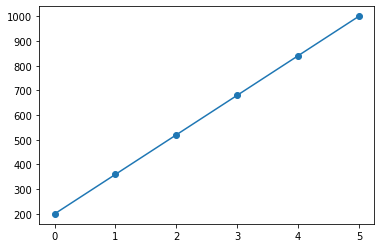

In [11]:
plt.plot(T, 'o-') 

In [17]:
def conduccion_1d(k, S, L, TA, TB, N):
    """
    Parameters
    ----------
    L: float
    Es la longitud
    
    S: float
    Es la fuente
   
    TA: float
    Es la condicón de frontera a la izquierda
    
    TB: float 
    Es la condición de frontera a la derecha
    
    N: int
    Es el número de nodos internos (grados de libertad).
    
    Return
    ------
    al final esta función dibuja la solución.
    """
#   L = 5.0
#   k = 0.02
#    S = 4
#    TA = 200
#   TB = 1000

#    N = 4
    h = L / (N+1)

    T = np.zeros (N+2)
    b = np.zeros (N)
    A = np.zeros ((N,N))

    r = k / h**2
    b[:] = S / r
    T[0] = TA
    T[-1] = TB
    b[0] += TA
    b[-1] += TB

    A[0,0] = 2
    A[0,1] = -1
    for i in range(1,N-1):
        A[i,i] = 2
        A[i,i+1] = -1
        A[i,i-1] = -1
    A[-1,-2] = -1
    A[-1,-1] = 2

    T[1:N+1] = np.linalg.solve(A,b)

    plt.plot(T)
    plt.show()

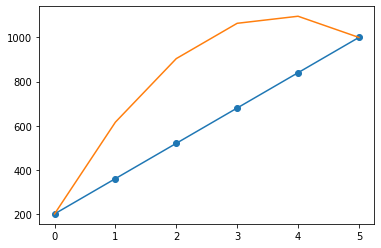

In [19]:
plt.plot(T, 'o-')
conduccion_1d(0.02, 1.0, 8.0, 200, 1000, 4)

In [14]:
import ipywidgets as widgets

In [15]:
w = widgets.interactive(conduccion_1d,
                       k = widgets.fixed(0.02),
                       S = widgets.FloatSlider(max=1.0, min=0.0, value=0, step=0.2),
                       L = widgets.fixed(5.0), 
                       TA = widgets.fixed(200),
                       TB = widgets.fixed(1000),
                       N = widgets.IntSlider(max=10, min=4, value=4))

interactive(children=(FloatSlider(value=0.0, description='S', max=1.0, step=0.2), IntSlider(value=4, descripti…

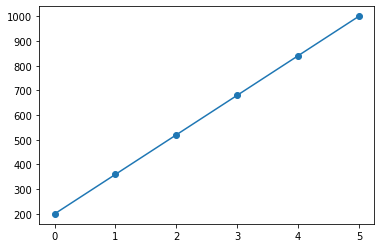

In [20]:
plt.plot(T, 'o-')
display(w)